In [1]:
import os
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import IPython
import sounddevice as sd

In [2]:
#Meros 3.1
fs, x = sp.io.wavfile.read("speech_utterance.wav",16000)
print("Sample rate: %d Hz" % fs)
print("Number of samples: %d" % x.shape[0])

Sample rate: 16000 Hz
Number of samples: 60212


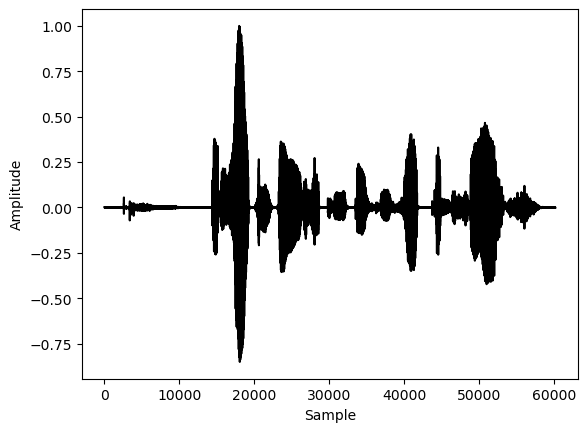

In [3]:
segment = x[:100000]
segment = segment/(np.max(np.abs(segment)))
#sd.play(y[:100000],fs)#It helps those people who help themselves
plt.plot(segment,'k')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In [4]:
IPython.display.Audio(x,rate=16000)

In [5]:
#Meros 3.2
w = [np.hamming(320),np.hamming(480),np.hamming(640),np.hamming(800)] 
#parathiro gia 20ms 30ms 40ms 50ms

[320 480 640 800]
[20 30 40 50]


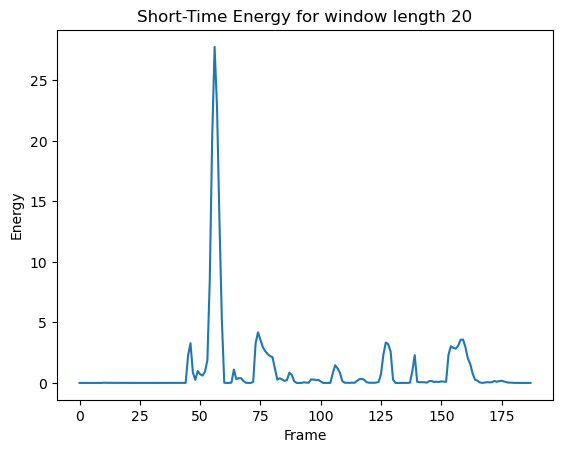

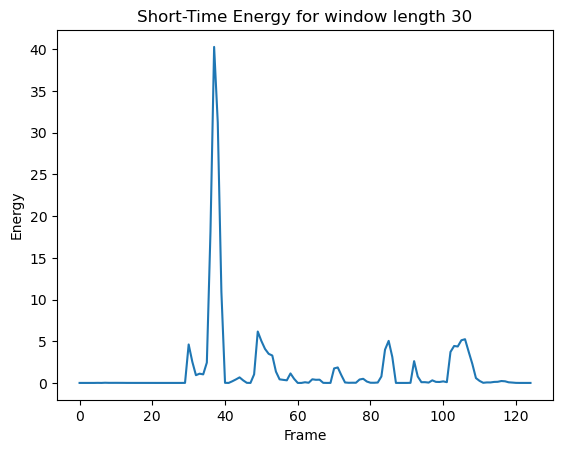

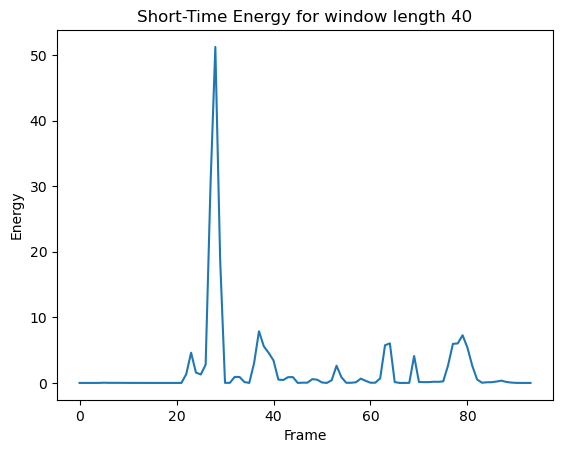

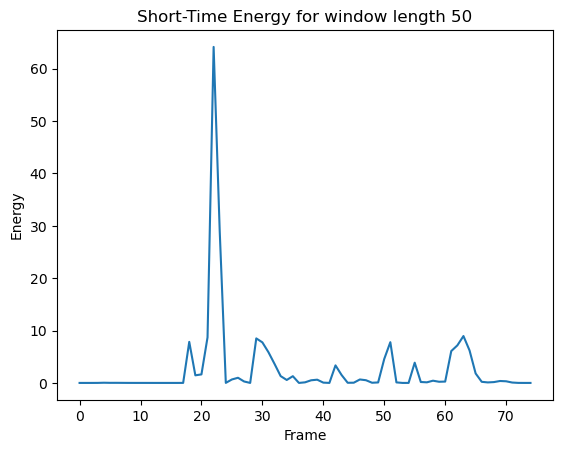

In [6]:
n=np.arange(0,60212,320)
msFrame=np.arange(20,60,10)
windsz=np.arange(320,960,160)
print(windsz) 
print(msFrame) 

for i,msF in enumerate(msFrame):
    nFrames = int(x.shape[0] / windsz[i])
    STEs = []
    for m in range(nFrames):
        start = m * windsz[i]
        end = start + windsz[i]
        sign=x[start:end]
        STEn = np.sum((sign**2)*w[i])
        STEs.append(STEn)
    plt.figure(i)
    plt.plot(STEs)
    plt.title('Short-Time Energy for window length %i' %msF)
    plt.ylabel('Energy')
    plt.xlabel('Frame')
    plt.savefig("%d.pdf"%i)

[320 480 640 800]
[20 30 40 50]


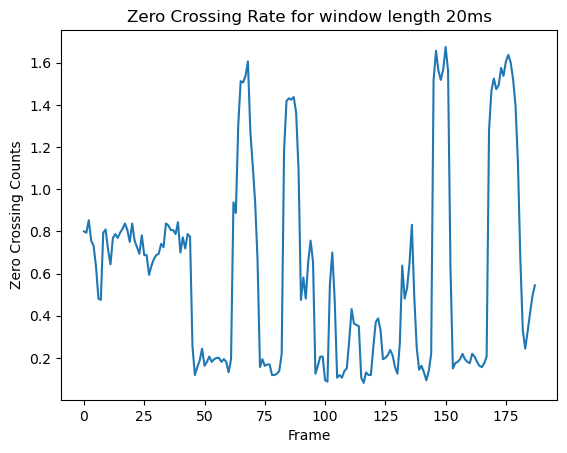

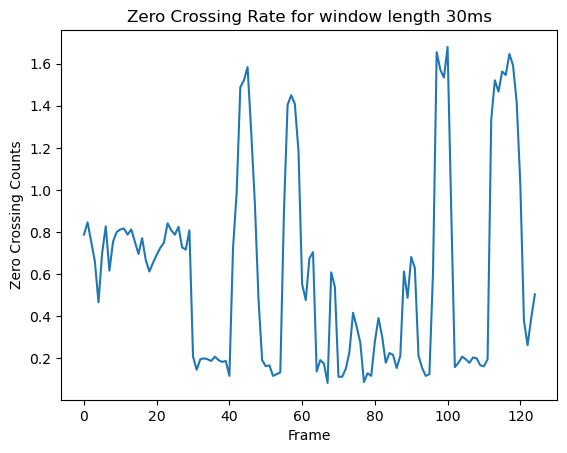

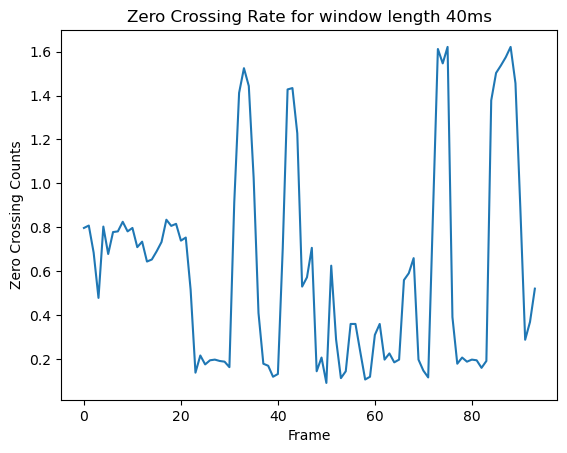

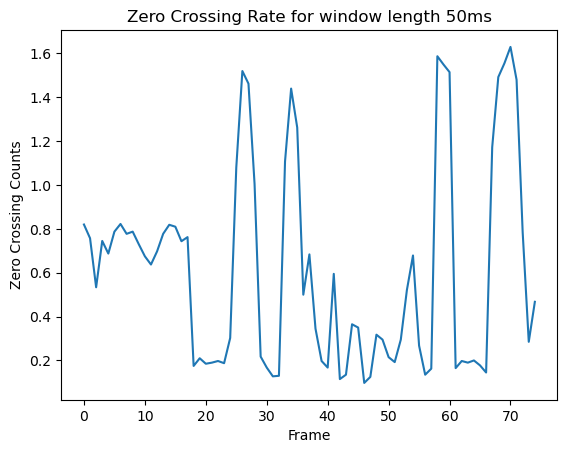

In [7]:
import IPython.display 
import soundfile as sf

n=np.arange(0,60212,320)
msFrame=np.arange(20,60,10)
windsz=np.arange(320,960,160)
print(windsz) 
print(msFrame)  

for i,msF in enumerate(msFrame):
    nFrames = int(x.shape[0] / windsz[i]) 
    sign = x #apla rename
    ZCCs = []   #opws eixame prin STEs
    for j in range(nFrames):
        start = j * windsz[i]
        end = start + windsz[i]
        s = sign[start:end] # s is the frame, named to correspond to the equation
        ZCC = 0
        for k in range(1, len(s)):
            ZCC += (np.abs(np.sign(s[k]) - np.sign(s[k - 1])))/(windsz[i])
        ZCCs.append(ZCC)
    plt.figure(i)
    plt.plot(ZCCs)
    plt.title('Zero Crossing Rate for window length %dms' %msF)
    plt.ylabel('Zero Crossing Counts')
    plt.xlabel('Frame')
    plt.savefig("%d.pdf"%i)

In [8]:
#Υψηλή ενεργεια και χαμηλο zero crossing rate στα φωνήεντα
#Χαμηλή ενεργεια και ψηλο zero crossing rate στα συμφωνα

For the window of 20ms:
Average Spectral Centroid: 296.20
Average Spectral Flux: 0.04


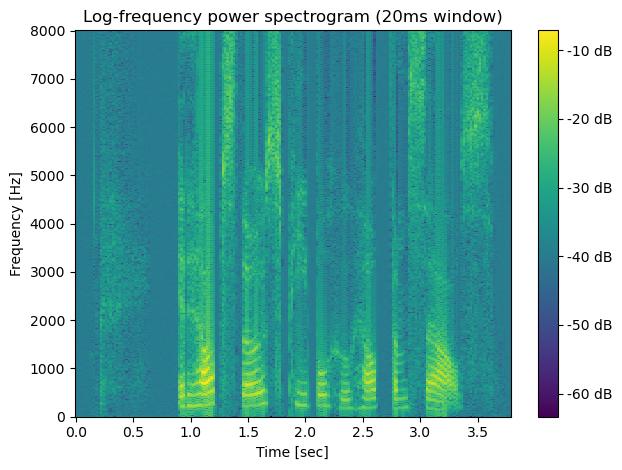

For the window of 30ms:
Average Spectral Centroid: 289.41
Average Spectral Flux: 0.03


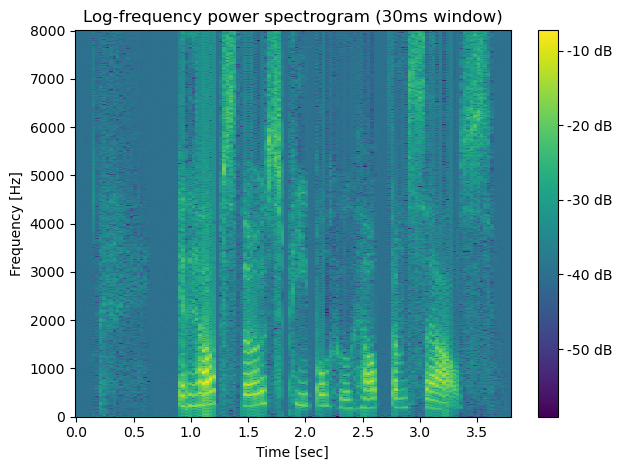

For the window of 40ms:
Average Spectral Centroid: 286.36
Average Spectral Flux: 0.02


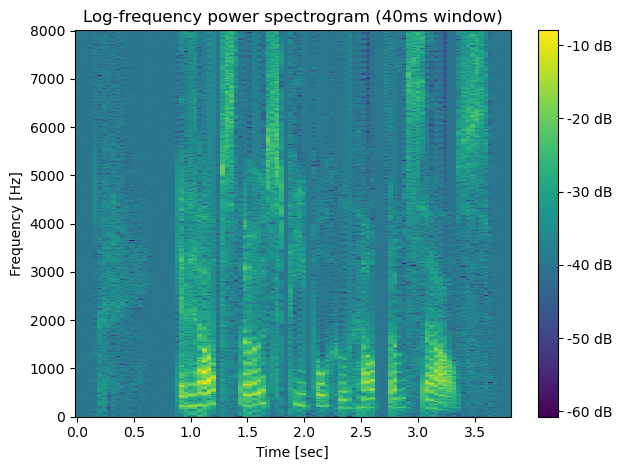

For the window of 50ms:
Average Spectral Centroid: 276.28
Average Spectral Flux: 0.01


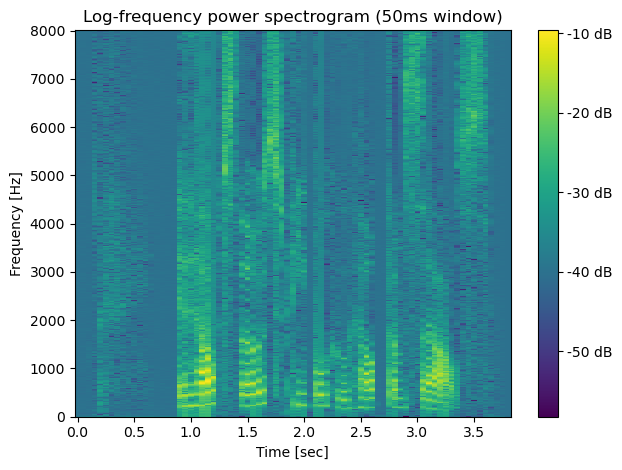

In [9]:
#Meros 3.3

# Define STFT parameters
nfft = 2048

# Compute STFT with different window sizes
window_sizes = [320,480,640,800]
msFrame=np.arange(20,60,10)
for i, size in enumerate(window_sizes):
    window = np.ones(window_sizes[i])
    nperseg = window_sizes[i]
    noverlap = 0
    f, t, Zxx = sp.signal.stft(x, fs, window=window, nperseg=nperseg, noverlap=noverlap, nfft=nfft)
    #f=dft, t=time in seconds, Zxx einai to stft
    eps = 1e-7
    sc = np.sum(np.square(np.abs(Zxx)) * np.arange(0, Zxx.shape[0])[:, np.newaxis], axis=0) / (np.sum(np.square(np.abs(Zxx)), axis=0) + eps)
    sf = np.sum(np.square(np.abs(np.diff(Zxx, axis=1))), axis=0)
    print("For the window of %dms:"%msFrame[i])
    avg_sc = np.mean(sc)
    avg_sf = np.mean(sf)
    print(f'Average Spectral Centroid: {avg_sc:.2f}')
    print(f'Average Spectral Flux: {avg_sf:.2f}') 
    #Power spectrogram to dB scale
    spec_db = 10 * np.log10(np.abs(Zxx+0.0001)) 
    
    # Plotting
    plt.figure(i)
    plt.pcolormesh(t, f, spec_db, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log-frequency power spectrogram ({((size/fs)*1000):.0f}ms window)')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.tight_layout()
    plt.savefig("%ds.png"%i)
    plt.show()
    

In [10]:
from IPython.display import Image
import imageio.v2 as imageio

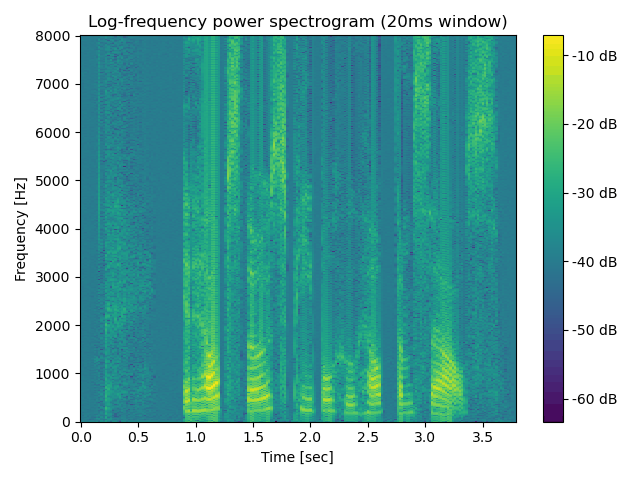

In [11]:
fig_filenames = ['0s.png', '1s.png', '2s.png', '3s.png']

# Set up the GIF file
with imageio.get_writer('spectrogram_speech.gif', mode='I') as writer:
    # Loop over each figure file
    for filename in fig_filenames:
        # Load the figure
        img = imageio.imread(filename)
        # Add the figure to the GIF
        writer.append_data(img)

# Show the final GIF
with open('spectrogram_speech.gif','rb') as f:
    display(Image(data=f.read(), format='gif'))